<a href="https://colab.research.google.com/github/Sukantanath108/Pytorch_practise_DL/blob/main/fashion_MnistCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_dataset = datasets.FashionMNIST(root='data',train=True,download=True,target_transform=None,transform=ToTensor())
test_dataset = datasets.FashionMNIST(root='data',train=False,download=True,target_transform=None,transform=ToTensor())

In [ ]:
len(train_dataset)

60000

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
image , label = train_dataset[9]
image.shape , label

(torch.Size([1, 28, 28]), 5)

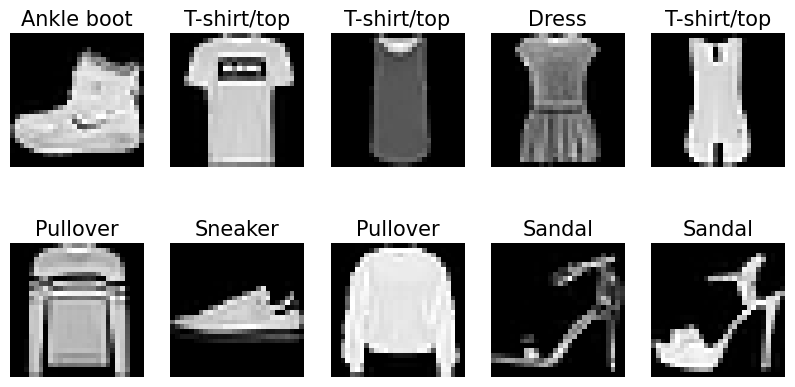

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,5))
for i in range(10):
  image, label = train_dataset[i]
  plt.subplot(2,5,i+1)
  plt.imshow(image.squeeze(),cmap='gray',interpolation=None) # Invalid shape (1, 28, 28) for image data if image.squueze isnt used (extra dimension remains)
  plt.title(train_dataset.classes[label],fontsize=15)
  plt.axis(False)
plt.show()

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train = DataLoader(train_dataset,batch_size = 32,shuffle =True,)
test = DataLoader(test_dataset,batch_size =32, shuffle= False)

In [ ]:
len(train),len(test)

(1875, 313)

In [ ]:
train_features , train_labels = next(iter(train))

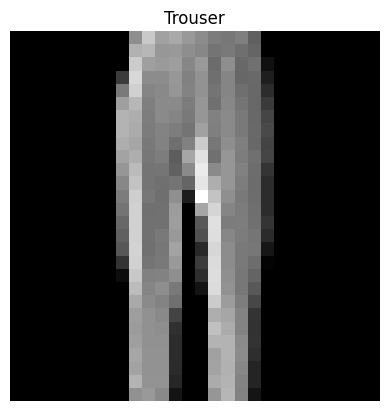

Image size: torch.Size([1, 28, 28])
Label: 1, Class: Trouser


In [ ]:
random_idx = torch.randint(0, len(train_dataset.classes), size=(1,)).item()
image, label = train_features[random_idx], train_labels[random_idx]
plt.title(train_dataset.classes[label])
plt.imshow(image.squeeze(), cmap='grey')
plt.axis(False)
plt.show()
print(f"Image size: {image.shape}")
print(f"Label: {label}, Class: {train_dataset.classes[label]}")

In [ ]:
class conv_model(nn.Module):

  '''
  using tny vgg form CNN explainer
  '''

  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int,
               ):
    super().__init__()

    self.conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2) # 14 x 14
    )

    self.conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2) # 7 * 7
    )

    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )


  def forward(self,x):
    x = self.conv_layer_1(x)

    x = self.conv_layer_2(x)

    x = self.classifer(x)
    return x

In [ ]:
torch.manual_seed(42)

model = conv_model(input_shape=1, # use 3 for RGB images
                   hidden_units=10,
                   output_shape=len(train_dataset.classes))
model.to(device)

conv_model(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Shape: {test_image.shape}")
print(f"Device: {test_image.device}")
print(f"Number of dimensions: {test_image.ndim}")
print(f"Number of elements in tensor: {test_image.numel()}")
print(f"Datatype: {test_image.dtype}")

Shape: torch.Size([3, 64, 64])
Device: cpu
Number of dimensions: 3
Number of elements in tensor: 12288
Datatype: torch.float32


In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # just 3 is fine
                       stride=1,
                       padding=0)

In [ ]:
test_image.shape , test_image.unsqueeze(dim=1).shape, test_image.unsqueeze(dim=0).shape

(torch.Size([3, 64, 64]),
 torch.Size([3, 1, 64, 64]),
 torch.Size([1, 3, 64, 64]))

In [ ]:
out = conv_layer(test_image.unsqueeze(dim=0))
out.shape

torch.Size([1, 10, 62, 62])

In [ ]:
maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
out_x = maxpool(out)
out_x.shape

torch.Size([1, 10, 31, 31])

In [ ]:
import requests
from pathlib import Path

In [ ]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary
from helper_functions import accuracy_fn

In [ ]:
from timeit import default_timer as timer

def time(start:float,end:float,device: torch.device=None):

  time = end - start
  print(f"Printing on {device} and time taken is: {time:.3f}")
  return time


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model.parameters(),lr=0.01,momentum=0.93)
optimizer_2 = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

def train_step(model: torch.nn.Module ,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_accuracy = 0, 0

  model.train()

  for batch, (X,y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)
  if epochs % 10 == 0:
    print(f"Loss : {train_loss:.4f} | Accuracy : {train_accuracy:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss , test_acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss  += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.2f}%")

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_on_gpu = timer()
epochs = 10

for epoch in tqdm(range(epochs)): #tqdm for progress bar
  print(f"Training epoch: {epoch}")
  train_step(model=model,
             data_loader=train,
             loss_fn=loss_fn,
             optimizer=optimizer_1,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model,
            data_loader=test,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end = timer()

time1 = time(start=train_on_gpu,end=train_end,device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Training epoch: 0
Loss : 0.5923 | Accuracy : 78.75%
Test Loss : 0.4266 | Test Accuracy : 84.83%
Training epoch: 1
Loss : 0.3609 | Accuracy : 86.98%
Test Loss : 0.3533 | Test Accuracy : 87.22%
Training epoch: 2
Loss : 0.3229 | Accuracy : 88.37%
Test Loss : 0.3436 | Test Accuracy : 87.57%
Training epoch: 3
Loss : 0.3042 | Accuracy : 89.04%
Test Loss : 0.3320 | Test Accuracy : 88.27%
Training epoch: 4
Loss : 0.2905 | Accuracy : 89.42%
Test Loss : 0.3160 | Test Accuracy : 88.62%
Training epoch: 5
Loss : 0.2827 | Accuracy : 89.70%
Test Loss : 0.3191 | Test Accuracy : 88.61%
Training epoch: 6
Loss : 0.2752 | Accuracy : 89.98%
Test Loss : 0.3118 | Test Accuracy : 88.63%
Training epoch: 7
Loss : 0.2686 | Accuracy : 90.22%
Test Loss : 0.2922 | Test Accuracy : 89.44%
Training epoch: 8
Loss : 0.2613 | Accuracy : 90.54%
Test Loss : 0.2971 | Test Accuracy : 89.26%
Training epoch: 9
Loss : 0.2539 | Accuracy : 90.79%
Test Loss : 0.3170 | Test Accuracy : 89.31%
Printing on cuda and time taken is: 165.

In [ ]:
def evaluate_model(model:model,
                   data_loader : torch.utils.data.DataLoader,
                   loss_fn : loss_fn,
                   accuracy_fn, device = device
                   ):

  loss , acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
    print(f"Loss : {loss:.4f} | Accuracy : {acc:.2f}%")

  return {'model_name':model.__class__.__name__,
          'model_loss':loss.item(),
          "model_accuracy" :acc}

In [ ]:
results = evaluate_model(model,test,loss_fn,accuracy_fn,device)
print(results)

  0%|          | 0/313 [00:00<?, ?it/s]

Loss : 0.3170 | Accuracy : 89.31%
{'model_name': 'conv_model', 'model_loss': 0.3170403838157654, 'model_accuracy': 89.30710862619809}


In [ ]:
def make_predictions(model:torch.nn.Module,data:list,
                     device: torch.device = device
                     ):
  preds = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      preds.append(pred_prob.cpu()) # for matplotlib
  return torch.stack(preds)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset),k=9): #choose k uniques element from a population
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '5')

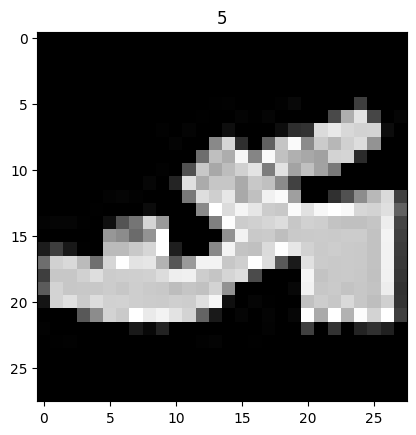

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(test_labels[0])

In [ ]:
pred_probs = make_predictions(model=model,data=test_samples)
pred_probs.shape

torch.Size([9, 10])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
classes = train_dataset.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

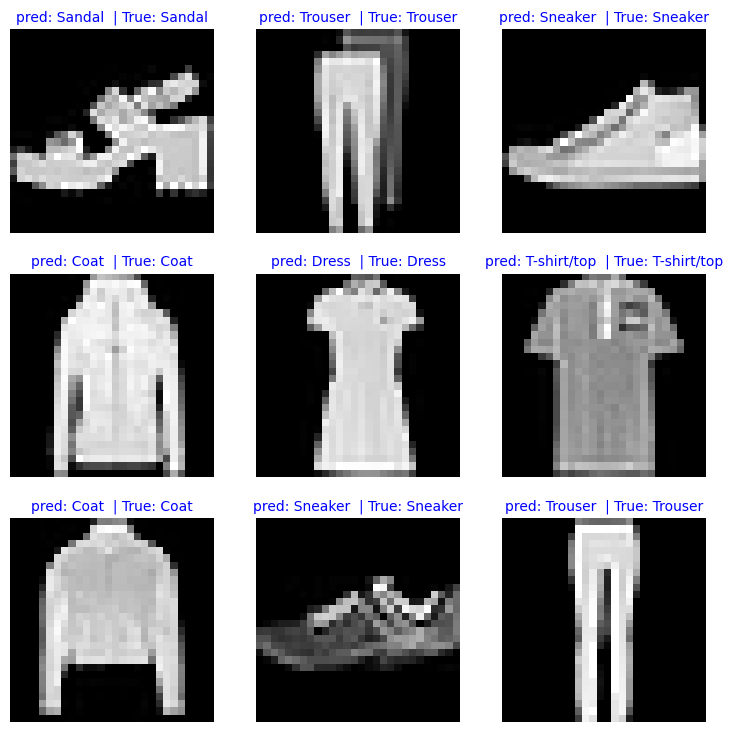

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap = 'grey')
  pred_label = classes[pred_classes[i]]
  truth_label = classes[test_labels[i]]
  tlt = f"pred: {pred_label}  | True: {truth_label}"
  if pred_label == truth_label:
    plt.title(tlt , c ='blue' , fontsize =10)
  else:
    plt.title(tlt,c='red',fontsize =10)
  plt.axis(False)


In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.23.4'

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from tqdm.auto import tqdm

y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test, desc='Making predictions ---'):
    X , y = X.to(device),y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:12]

Making predictions ---:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5])

In [ ]:
!pip install torchmetrics

In [ ]:
test_dataset.targets[:12]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5])

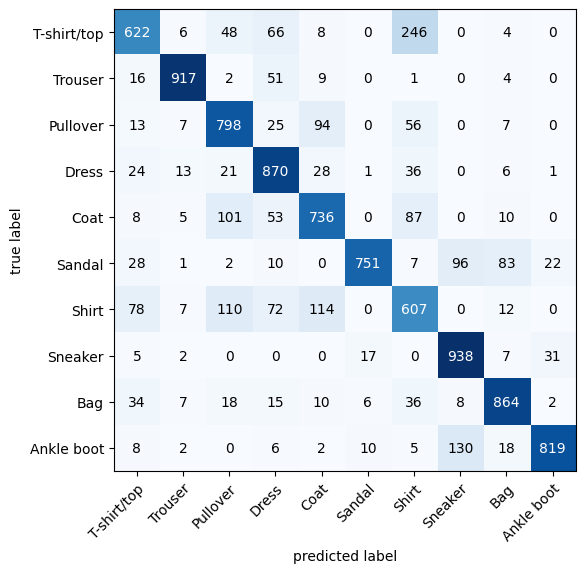

In [ ]:
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(classes))
confmat_tensor = confmat(preds= y_pred_tensor, target = test_dataset.targets)
confmat_tensor

fig , ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names=classes,
    figsize=(10,6)

)

#SAVE AND LOAD BEST MODEL

In [ ]:
from pathlib import Path

MODEL_PATH = Path('my_models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'fashion_mnist_cv_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


In [ ]:
MODEL_SAVE_PATH

PosixPath('my_models/fashion_mnist_cv_model.pth')

In [ ]:
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

Saving model to my_models/fashion_mnist_cv_model.pth


In [ ]:
# create a new instance
torch.manual_seed(42)
load_model = conv_model(input_shape=1,
                        hidden_units = 10,
                        output_shape= len(classes))
load_model

conv_model(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

load_model.to(device)

conv_model(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
results

{'model_name': 'conv_model',
 'model_loss': 0.3170403838157654,
 'model_accuracy': 89.30710862619809}

In [ ]:
# Evaluate loaded model

torch.manual_seed(42)
loaded_model_results = evaluate_model(model=load_model,data_loader=test,loss_fn = loss_fn,
                                      accuracy_fn=accuracy_fn,device=device)
loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

Loss : 0.3170 | Accuracy : 89.31%


{'model_name': 'conv_model',
 'model_loss': 0.3170403838157654,
 'model_accuracy': 89.30710862619809}

In [ ]:
torch.isclose(torch.tensor(results['model_loss']),
              torch.tensor(loaded_model_results['model_loss']))

tensor(True)